In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import talib
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import csv
import time
plt.rcParams['font.family']='SimHei' # 顯示中文('SimHei' for MacOS)

'''today = date.today()
print(today.strftime("%Y%m%d"))'''

fina=input('輸入個股代碼(ex:1101)：')
date=input('輸入日期(ex:2018/10/01)：')

inday=datetime.datetime.strptime(date,"%Y/%m/%d")
inday=datetime.datetime.strptime(inday.strftime('%Y/%m/'+'01'),"%Y/%m/%d")
ago=[(inday+relativedelta(years=-1)+relativedelta(months=+i)).strftime('%Y%m%d') for i in range(13) ]
ago

輸入個股代碼(ex:1101)：1101
輸入日期(ex:2018/10/01)：2018/04/04


['20170401',
 '20170501',
 '20170601',
 '20170701',
 '20170801',
 '20170901',
 '20171001',
 '20171101',
 '20171201',
 '20180101',
 '20180201',
 '20180301',
 '20180401']

In [2]:
month = ago[0]
data = {
    'response':'json',
    'date': month,
    'stockNo':fina,
}
dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
result = json.loads(dres.text)
df1 = pd.DataFrame(result['data'])
df1.columns = result['fields']
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/04/05,"7,385,595","272,791,615",36.40,37.20,36.40,37.05,+0.75,"3,091"
1,106/04/06,"5,074,098","189,024,716",37.20,37.45,37.10,37.30,+0.25,"2,430"
2,106/04/07,"3,786,727","139,563,512",36.95,37.25,36.50,37.15,-0.15,"1,496"
3,106/04/10,"978,271","36,190,027",37.15,37.15,36.85,37.00,-0.15,619
4,106/04/11,"3,063,366","113,436,504",37.00,37.30,36.90,36.90,-0.10,"1,280"
5,106/04/12,"4,321,948","159,601,983",37.25,37.50,36.70,36.85,-0.05,"1,886"
6,106/04/13,"2,235,480","82,362,900",36.90,37.05,36.75,36.75,-0.10,"1,101"
7,106/04/14,"2,230,761","81,582,255",36.60,36.75,36.40,36.50,-0.25,"1,074"
8,106/04/17,"2,460,829","89,759,637",36.65,36.70,36.35,36.50,0.00,"1,750"
9,106/04/18,"3,836,886","139,789,711",36.60,36.65,36.25,36.45,-0.05,"1,509"


In [3]:
for month in ago[1:13] :
    data = {
        'response':'json',
        'date': month,
        'stockNo':fina,
    }
    dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
    result = json.loads(dres.text)
    tmp = pd.DataFrame(result['data'])
    tmp.columns = result['fields']
    df1=df1.append(tmp).reset_index(drop=True)
    print(month)
    time.sleep(3)

20170501
20170601
20170701
20170801
20170901
20171001
20171101
20171201
20180101
20180201
20180301
20180401


In [4]:
df1['開盤價']=df1['開盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最高價']=df1['最高價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最低價']=df1['最低價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['收盤價']=df1['收盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交股數']=df1['成交股數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交金額']=df1['成交金額'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交筆數']=df1['成交筆數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['漲跌價差']=df1['漲跌價差'].str.replace('+','')
df1['漲跌價差']=df1['漲跌價差'].str.replace('X','').astype(dtype=float,errors='ignore')
pd.set_option('display.max_rows', 1000)
indexNames = df1[ df1['成交金額'] == 0 ].index
df1 = df1.drop(indexNames)
df1=df1.reset_index(drop=True)
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/04/05,7385595.0,2.727916e+08,36.40,37.20,36.40,37.05,0.75,3091.0
1,106/04/06,5074098.0,1.890247e+08,37.20,37.45,37.10,37.30,0.25,2430.0
2,106/04/07,3786727.0,1.395635e+08,36.95,37.25,36.50,37.15,-0.15,1496.0
3,106/04/10,978271.0,3.619003e+07,37.15,37.15,36.85,37.00,-0.15,619.0
4,106/04/11,3063366.0,1.134365e+08,37.00,37.30,36.90,36.90,-0.10,1280.0
5,106/04/12,4321948.0,1.596020e+08,37.25,37.50,36.70,36.85,-0.05,1886.0
6,106/04/13,2235480.0,8.236290e+07,36.90,37.05,36.75,36.75,-0.10,1101.0
7,106/04/14,2230761.0,8.158226e+07,36.60,36.75,36.40,36.50,-0.25,1074.0
8,106/04/17,2460829.0,8.975964e+07,36.65,36.70,36.35,36.50,0.00,1750.0
9,106/04/18,3836886.0,1.397897e+08,36.60,36.65,36.25,36.45,-0.05,1509.0


In [9]:
def RSI(n,index):
    mean_up=0
    mean_down=0
    data=df1.loc[index-(n-1):index,'漲跌價差']
    for i in data :
        if float(i)>0:
            mean_up+=float(i)
        else:
            mean_down-=float(i)
    mean_up/=n
    mean_down/=n
    if mean_down == 0 :
        return np.nan
    else :
        rs=mean_up/mean_down
        rsi=100*rs/(1+rs)
        return rsi
def KD(n,index,K_before,D_before):
    Mtoday=float(df1.at[index,'收盤價'])
    data=df1.loc[index-(n-1):index,'收盤價']
    Max=float(max(data))
    Min=float(min(data))
    RSV=(Mtoday-Min)/(Max-Min) *100
    K=K_before*0.6667+RSV*0.3333
    D=D_before*0.6667+K*0.3333
    return (K,D)
#RSI_6
N_day=6
rsi=RSI(N_day,N_day-1)
df1.loc[N_day-1,'RSI_6']=rsi
for i in range(N_day,len(df1)):
    rsi=RSI(N_day,i)
    df1.loc[i,'RSI_6']=rsi
#RSI_12
N_day=12
rsi=RSI(N_day,N_day-1)
df1.loc[N_day-1,'RSI_12']=rsi
for i in range(N_day,len(df1)):
    rsi=RSI(N_day,i)
    df1.loc[i,'RSI_12']=rsi
#KD_5
N_day=5
K,D=KD(N_day,N_day-1,50,50)
df1.loc[N_day-1,'K']=K
df1.loc[N_day-1,'D']=D
for i in range(N_day,len(df1)):
    K,D=KD(N_day,i,K,D)
    df1.loc[i,'K']=K
    df1.loc[i,'D']=D
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,RSI_6,RSI_12,K,D
0,106/04/05,7385595.0,2.727916e+08,36.40,37.20,36.40,37.05,0.75,3091.0,NaN,NaN,NaN,NaN
1,106/04/06,5074098.0,1.890247e+08,37.20,37.45,37.10,37.30,0.25,2430.0,NaN,NaN,NaN,NaN
2,106/04/07,3786727.0,1.395635e+08,36.95,37.25,36.50,37.15,-0.15,1496.0,NaN,NaN,NaN,NaN
3,106/04/10,978271.0,3.619003e+07,37.15,37.15,36.85,37.00,-0.15,619.0,NaN,NaN,NaN,NaN
4,106/04/11,3063366.0,1.134365e+08,37.00,37.30,36.90,36.90,-0.10,1280.0,NaN,NaN,33.335000,44.445555
5,106/04/12,4321948.0,1.596020e+08,37.25,37.50,36.70,36.85,-0.05,1886.0,68.965517,NaN,22.224445,37.039259
6,106/04/13,2235480.0,8.236290e+07,36.90,37.05,36.75,36.75,-0.10,1101.0,31.250000,NaN,14.817037,29.632593
7,106/04/14,2230761.0,8.158226e+07,36.60,36.75,36.40,36.50,-0.25,1074.0,0.000000,NaN,9.878519,23.048560
8,106/04/17,2460829.0,8.975964e+07,36.65,36.70,36.35,36.50,0.00,1750.0,0.000000,NaN,6.586008,17.561591
9,106/04/18,3836886.0,1.397897e+08,36.60,36.65,36.25,36.45,-0.05,1509.0,0.000000,NaN,4.390892,13.171797


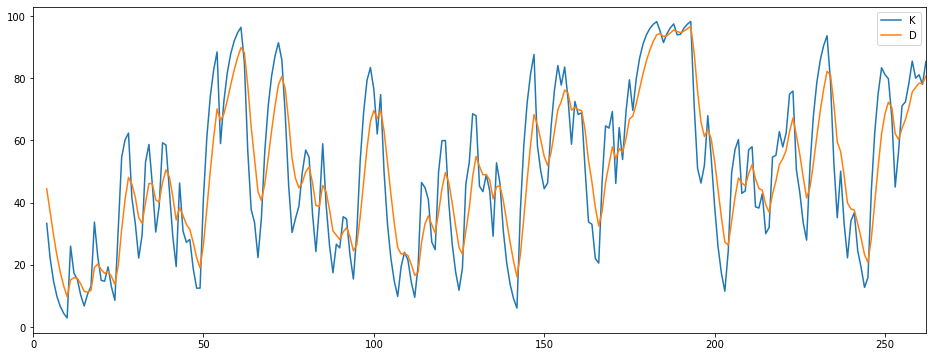

In [37]:
plt.figure(figsize=(16,6))
df1['K'].plot()
df1['D'].plot()
plt.legend()

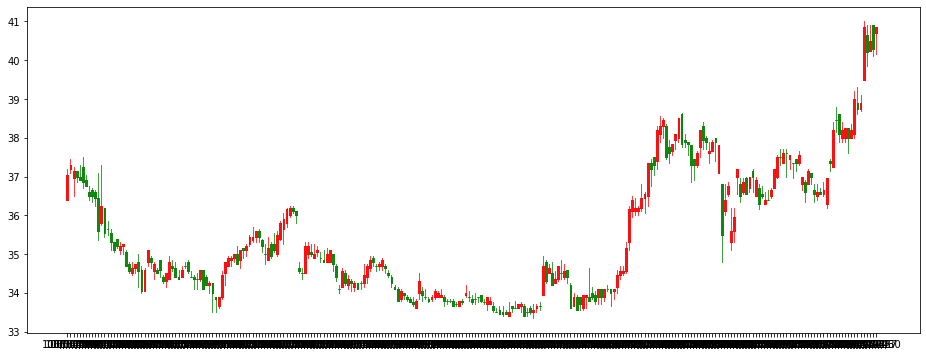

In [39]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df1['日期']), 1))
ax.set_xticklabels(df1['日期'][::1])
mpf.candlestick2_ochl(ax, df1['開盤價'], df1['收盤價'], df1['最高價'],
                      df1['最低價'], width=0.6, colorup='r', colordown='g', alpha=0.75); 